<a href="https://colab.research.google.com/github/migo2555/ml-product-category-prediction-based-on-title-/blob/main/notebook/product_category_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Product Category Prediction Based on Product Title  

**Notebook:** `product_category_prediction.ipynb`  
**Project:** `ml-product-category-prediction-based-on-title-`

**Author:** `Jovic Miodrag`

This project focuses on building a Machine Learning model that predicts the product category based solely on the product title.  
The dataset contains product listings, including their titles and associated categories.  
The goal is to analyze the text data, preprocess it, extract features, and train an ML model capable of accurately predicting product categories.


## Step 1 — Load Dataset from GitHub

In this first step, we load the dataset directly from the GitHub repository using its raw file URL.  
We use `pandas` to read the CSV file into a DataFrame and display basic information such as:

- total number of rows  
- the first few rows of the dataset  

This allows us to verify that the data was successfully loaded and to understand its structure before performing any preprocessing or modeling.

In [ ]:
import pandas as pd

# load data from GitHub
url = "https://raw.githubusercontent.com/migo2555/ml-product-category-prediction-based-on-title-/main/data/TASK_03-products.csv"

df = pd.read_csv(url)

print("Number of rows:", len(df))
print("First 5 rows:")
print(df.head())


Number of rows: 35311
First 5 rows:
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC            860.0              2.5   
1   Mobile Phones    KA-2501-QO           3772.0              4.8   
2   Mobile Phones    FP-8086-IE           3092.0              3.9   
3   Mobile Phones    YI-0086-US            466.0              3.4   
4   Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0       5/10/2024  
1      12/31/2024  
2 

##  Step 2 — Exploring the Dataset

In this step, we perform a quick exploratory check of the dataset:

 **Dataset shape** — prints the number of rows and columns to understand the dataset size.  
 **First 5 rows** — displays the first few records to get an overview of the data.  
 **Dataset info** — shows column names, data types, and non-null counts to identify missing values and understand data types.


In [ ]:
# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()


Dataset shape (rows, columns): (35311, 8)

First 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


**Result Highlights:**
- The dataset contains **35,311 rows** and **8 columns**.  
- Some columns, like `Product Title`, `Category Label`, `_Product Code`, `Number_of_Views`, `Merchant Rating`, and `Listing Date`, have **missing values**.  
- The data types are a mix of **integers, floats, and objects (strings)**.  

This initial exploration helps us identify columns that may need cleaning or preprocessing in the next step.

## Step 3 — Checking Missing Values

In this step, we check for **missing values** in the dataset.  
The code below counts the number of missing (NaN) values for each column using `df.isna().sum()`.  

This helps identify which columns require **data cleaning or imputation** before training the ML model.


In [ ]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


## Step 4 — Visualizing Missing Values

In this step, we create a **heatmap** to visualize missing values in the dataset.  
Using `seaborn` and `matplotlib`, the heatmap highlights which rows and columns contain NaN values, making it easier to spot patterns of missing data.  

This visual check complements the previous step where we counted missing values per column.


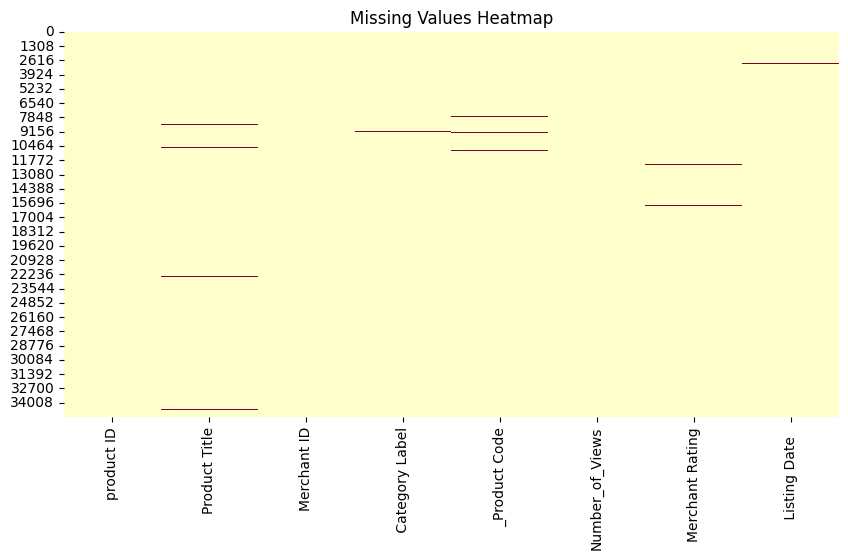

In [ ]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()


## Step 5 — Visualize Missing Values

In this step, we visualize the missing values in the dataset.  

1. **Bar chart (Matplotlib)** — shows the number of missing values per column.  
2. **Colored bar chart (optional / enhanced)** — uses different colors to make columns with missing values easier to distinguish.  

This step helps identify problematic columns and guides decisions for data cleaning before model training.


In [ ]:
# Count missing values per column
missing_counts = df.isna().sum()

print("Missing values per column:")
print(missing_counts)

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


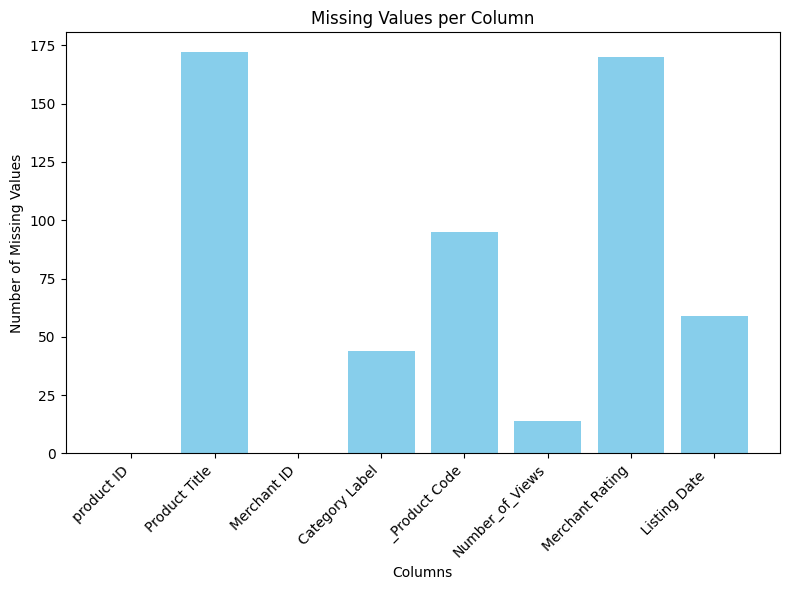

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count missing values per column
missing_counts = df.isna().sum()

# Plot missing values as a bar chart
plt.figure(figsize=(8,6))
plt.bar(x=missing_counts.index, height=missing_counts.values, color='skyblue')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')  # Rotira nazive kolona radi preglednosti
plt.tight_layout()
plt.show()

## Step 6 - Cleaning Column Names

The code below removes any leading or trailing spaces from the column names.
This ensures consistent naming and prevents errors when accessing columns later in the workflow.

In [ ]:
df.columns = df.columns.str.strip()

print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['product ID', 'Product Title', 'Merchant ID', 'Category Label', '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date']


## Step 7 — Cleaning and Preprocessing the Dataset

This step performs essential data-cleaning operations to prepare the dataset for modeling.
The preprocessing includes:

- Renaming columns for consistency and easier use in code.

- Handling missing values:

    - Numeric columns are filled with the median.

    - Text columns are filled with the placeholder "Unknown".

- Removing rows with missing target labels (Category_Label).

- Standardizing text columns by converting them to lowercase and stripping extra spaces.

- Converting the date column (Listing_Date) into a proper datetime format.

These operations ensure that the dataset is clean, consistent, and ready for the next stage—feature engineering and model training.

In [ ]:
import pandas as pd

# Rename columns for easier access
df = df.rename(columns={
    'Product Title': 'Product_Title',
    'Category Label': 'Category_Label',
    '_Product Code': 'Product_Code',
    'Merchant Rating': 'Merchant_Rating',
    'Listing Date': 'Listing_Date'
})

# Drop all rows with missing values
df = df.dropna()

# Define numeric and text columns
numeric_cols = ['Number_of_Views', 'Merchant_Rating']
text_cols = ['Product_Title', 'Product_Code']

# Fill missing numeric values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing text values with "unknown"
for col in text_cols:
    df[col] = df[col].fillna("unknown")

# Convert Listing_Date to datetime; missing values become NaT
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'], errors='coerce')

# Drop rows with missing target category
df = df.dropna(subset=['Category_Label'])

# Standardize text columns to lowercase and strip whitespace
for col in ['Product_Title', 'Category_Label', 'Product_Code']:
    df[col] = df[col].str.lower().str.strip()

# Show final dataset info
print("Cleaned dataset info:")
df.info()

print("\nCleaned dataset head:")
display(df.head())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 34760 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product ID       34760 non-null  int64         
 1   Product_Title    34760 non-null  object        
 2   Merchant ID      34760 non-null  int64         
 3   Category_Label   34760 non-null  object        
 4   Product_Code     34760 non-null  object        
 5   Number_of_Views  34760 non-null  float64       
 6   Merchant_Rating  34760 non-null  float64       
 7   Listing_Date     34760 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.4+ MB

Cleaned dataset head:


,product ID,Product_Title,Merchant ID,Category_Label,Product_Code,Number_of_Views,Merchant_Rating,Listing_Date
0,1,apple iphone 8 plus 64gb silver,1,mobile phones,qa-2276-xc,860.0,2.5,2024-05-10
1,2,apple iphone 8 plus 64 gb spacegrau,2,mobile phones,ka-2501-qo,3772.0,4.8,2024-12-31
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,mobile phones,fp-8086-ie,3092.0,3.9,2024-11-10
3,4,apple iphone 8 plus 64gb space grey,4,mobile phones,yi-0086-us,466.0,3.4,2022-05-02
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,mobile phones,nz-3586-wp,4426.0,1.6,2023-04-12


## Summary:

The dataset has been thoroughly cleaned: numeric missing values were imputed with medians, text fields with "Unknown", textual data standardized, and the date column converted to datetime. Rows missing the target label were removed, resulting in 35,208 complete records.

## Step 8 - Dataset Overview

Check the new shape of the dataset and verify that there are no missing values in the columns.


In [ ]:
# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (34760, 8)
Missing values per column:
product ID         0
Product_Title      0
Merchant ID        0
Category_Label     0
Product_Code       0
Number_of_Views    0
Merchant_Rating    0
Listing_Date       0
dtype: int64


## Random Sample of Product Titles  

This cell displays 20 randomly selected product titles from the dataset.  
It helps to get a quick sense of the diversity and format of product names, which is useful for feature engineering and understanding the text data.


In [ ]:
df['Product_Title'].sample(20).tolist()

['neff c1apg64n0b n50 compact oven with microwave and steam',
 'caple cm123 60cm built in microwave grill for tall housing stainless steel',
 'amica fkr29653b retro style 179x55cm 250l freestanding fridge freezer black',
 'samsung qe65q8fna/qe65q8fna',
 'lg electronics 55uk7550 led tv eec a dvb t2 dvb c dvb s uhd smart tv wlan pvr ready ci silver',
 'hewlett packard enterprise intel xeon e5630 2.53ghz 12mb l3 processor',
 'nikon z 6 body',
 'siemens gi38na55gb 56cm wide frost free integrated upright in column freezer white',
 'samsung 55 black nu8070 dynamic crystal colour ultra hd certified hdr 1000 smart 4k tv ue55nu8070txxu',
 'sony kd 49xe8004 bravia xe8004 series 49 class 48.5 viewable led tv',
 'sony kdl32wd756bu 32 led smart wifi tv free 5 year guarantee',
 'fisher paykel e522blxfdu4',
 'fridgemaster mul49102b 50cm wide freestanding larder fridge black',
 'aeg l7wbg741r 7000 series 7kg wash 4kg dry 1400rpm freestanding washer dryer white',
 'beko lcsm1545w tall larder fridge',
 

## Step 9 - Feature Engineering on Product Titles

This step extracts useful features from the `Product_Title` column to improve model performance:

- `title_word_count`: Number of words in the product title  
- `title_char_count`: Number of characters in the product title  
- `digit_count`: Count of numeric digits in the title  
- `brand`: First word of the title, often representing the brand  
- `has_4k`, `has_led`, `has_usb`: Binary features indicating the presence of key technical terms  

These features help capture additional information beyond the raw product title, providing the model with richer context for category prediction.


In [ ]:
# Word count in product title
df['title_word_count'] = df['Product_Title'].str.split().apply(len)

# Character count in product title
df['title_char_count'] = df['Product_Title'].str.len()

# Number of digits in product title
df['digit_count'] = df['Product_Title'].str.count(r'\d')

# Extract brand (first word in the title)
df['brand'] = df['Product_Title'].str.split().str[0].str.lower()

# Key technical terms (example: 4K, LED, USB)
df['has_4k'] = df['Product_Title'].str.contains(r'\b4k\b', case=False, regex=True).astype(int)
df['has_led'] = df['Product_Title'].str.contains(r'\bled\b', case=False, regex=True).astype(int)
df['has_usb'] = df['Product_Title'].str.contains(r'\busb\b', case=False, regex=True).astype(int)

# Display the first few rows to verify
print("Dataset with key engineered features:")
display(df.sample(20))


Dataset with key engineered features:


,product ID,Product_Title,Merchant ID,Category_Label,Product_Code,Number_of_Views,Merchant_Rating,Listing_Date,title_word_count,title_char_count,digit_count,brand,has_4k,has_led,has_usb
11669,21225,panasonic lumix dmc tz70 digital camera black,88,digital cameras,bb-8284-rv,868.0,1.1,2024-09-17,7,45,2,panasonic,0,0,0
21510,31839,washing machine,347,washing machines,lv-7979-yb,4506.0,1.2,2023-08-30,2,15,0,washing,0,0,0
26617,37665,hisense rq560n4wc1 american style frost free f...,130,fridge freezers,uj-3906-hx,4894.0,1.2,2022-09-09,8,59,5,hisense,0,0,0
18773,28907,bosch smv46gx00e geschirrsp ler vollintegrierb...,300,dishwashers,eg-6428-tr,1746.0,3.3,2022-08-28,6,53,6,bosch,0,0,0
294,295,samsung galaxy s9 midnight black 5.8 64gb 4g u...,5,mobile phones,mm-4633-vc,699.0,1.5,2022-11-10,11,62,6,samsung,0,0,0
2686,2694,binatone m250 big button gsm phone black,17,mobile phones,rq-2910-vu,280.0,1.5,2023-10-09,7,40,3,binatone,0,0,0
16944,26756,neff s515t80d1g 14 place fully integrated dish...,6,dishwashers,kq-7864-cp,419.0,1.7,2024-03-16,7,52,8,neff,0,0,0
35201,47240,indesit ins1612 built in over counter fridge,179,fridges,ow-6223-df,2462.0,4.7,2022-02-16,7,44,4,indesit,0,0,0
6111,12139,sharp lc 55cug8362ks 55 inch 4k ultra hd certi...,1,tvs,tc-1519-sk,397.0,2.5,2023-11-28,12,65,9,sharp,1,0,0
3758,3769,samsung i5500 galaxy 5 mobile phone,48,mobile phones,nj-4396-hd,3554.0,2.7,2023-01-18,6,35,5,samsung,0,0,0


## Step 10 — Outlier Detection with Seaborn Boxplots

This step uses seaborn boxplots to visually inspect potential outliers in numerical features like product views and merchant ratings.

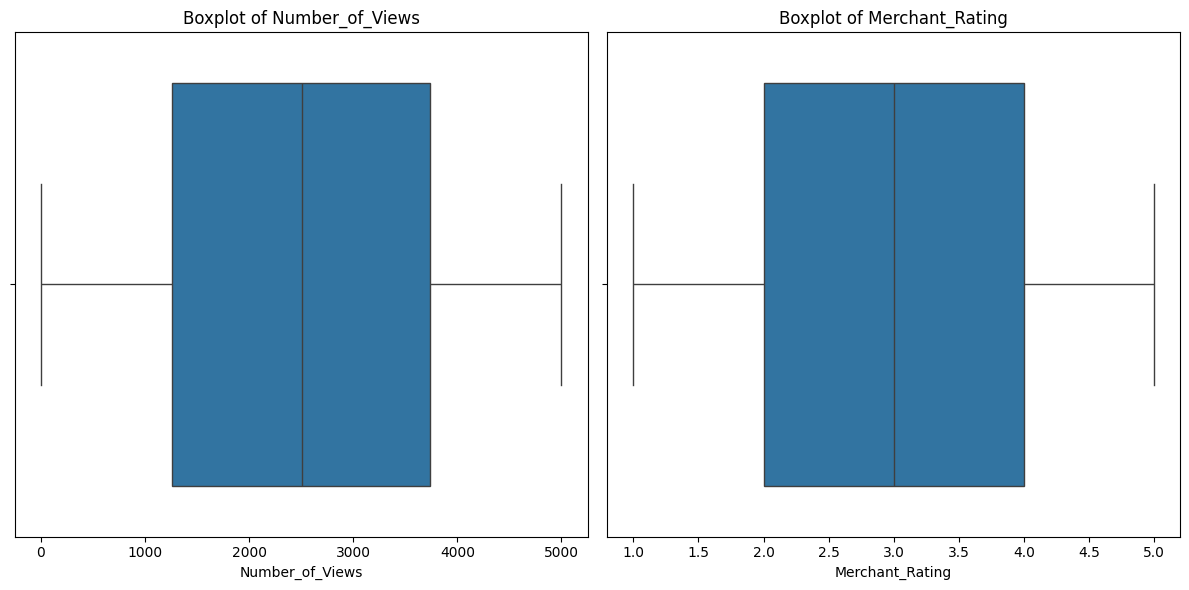

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

features = ['Number_of_Views', 'Merchant_Rating']

for i, col in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


## Boxplot Analysis

Boxplots show that Number_of_Views has a wide spread (≈1250–3800) with a median around 2500, indicating varying product popularity and a few high-value outliers.
Merchant_Rating is more stable, ranging from 2 to 4 with a median near 3, showing that most sellers have average ratings and very few extreme values.

## Step 11 — Top 20 Brands Distribution

Bar chart shows the distribution of the 20 most frequent brands in the dataset. This helps identify which brands dominate the listings and provides insights into potential class imbalance in modeling

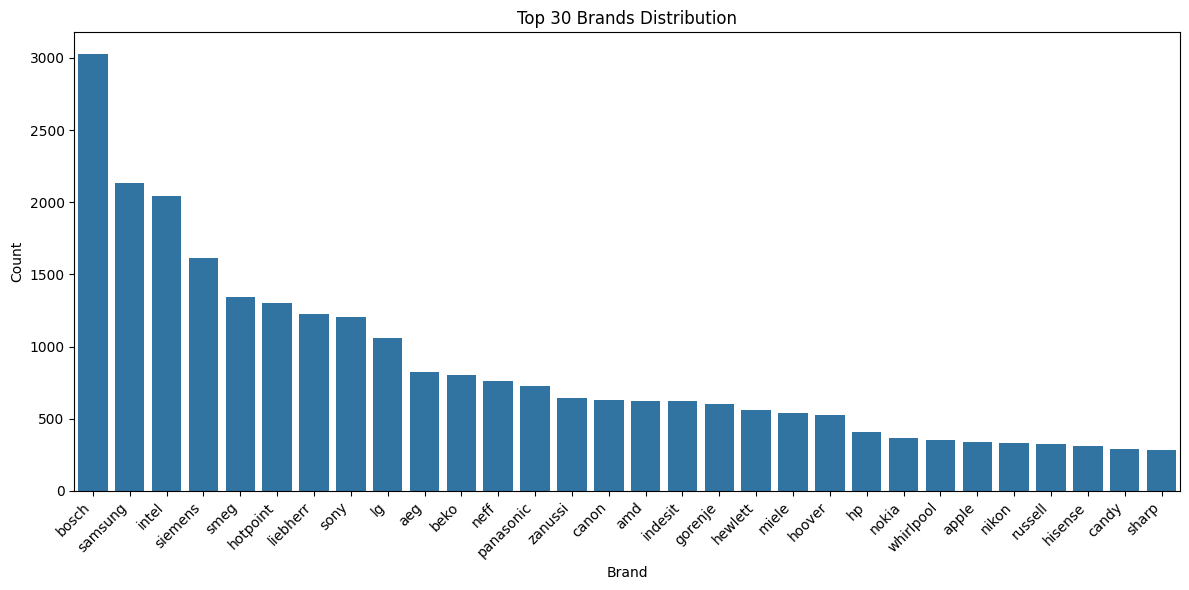

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 30 brands distribution
top_brands = df['brand'].value_counts().nlargest(30).index

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df[df['brand'].isin(top_brands)],
    x='brand',
    order=top_brands
)

plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Brands Distribution")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Step 12 — Category Distribution

Bar chart displays the distribution of all product categories in the dataset, helping visualize class frequencies and identify potential imbalances before modeling.

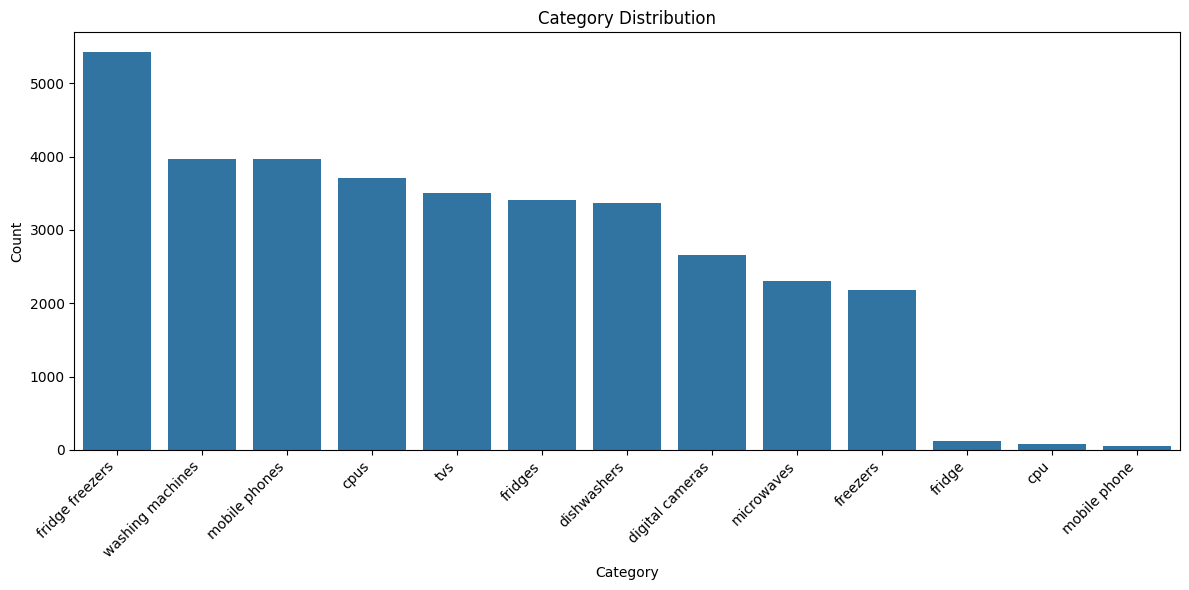

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category_Label', order=df['Category_Label'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Step 13 — Category Label Cleaning

Bar chart shows duplicate and inconsistent category labels (e.g., fridges vs fridge, cpus vs cpu, mobile phones vs mobile phone). These inconsistencies can confuse the model and reduce prediction accuracy. Cleaning and standardizing the categories is necessary before modeling.

In [ ]:
# Standardize category labels
df['Category_Label'] = df['Category_Label'].str.lower().str.strip()

category_mapping = {
    'freezers': 'fridge freezers',
    'fridge': 'fridges',
    'washing maschines': 'washing machines',
    'mobile phone': 'mobile phones',
    'cpu': 'cpus',
    'tv': 'tvs',
    'digital camera': 'digital cameras',
    'microwave': 'microwaves',
    'dishwasher': 'dishwashers'
}

# Apply the mapping
df['Category_Label'] = df['Category_Label'].replace(category_mapping)

# Verify the cleaning
print("Unique categories after cleaning:")
print(df['Category_Label'].value_counts())


Unique categories after cleaning:
Category_Label
fridge freezers     7606
mobile phones       4023
washing machines    3971
cpus                3792
fridges             3524
tvs                 3502
dishwashers         3374
digital cameras     2661
microwaves          2307
Name: count, dtype: int64


## Step 14 — Category Distribution After Cleaning

Bar chart visualizes the updated category distribution after merging duplicates and standardizing labels. This ensures that the dataset is consistent and ready for modeling.


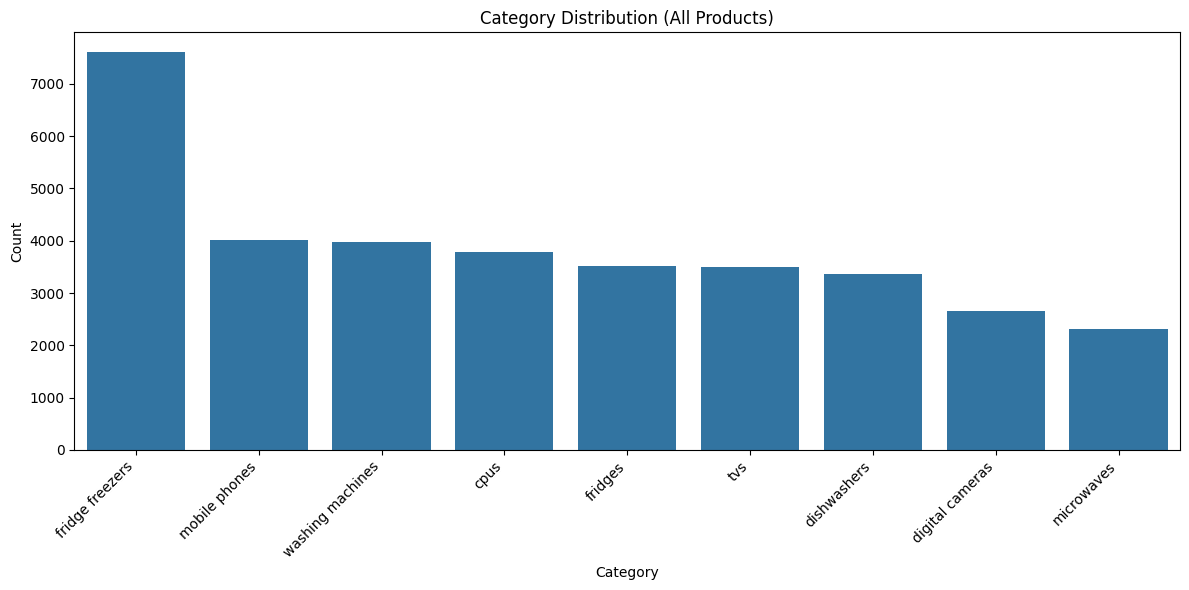

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category_Label', order=df['Category_Label'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Category Distribution (All Products)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Step 15 — Brand & Category Combinations

This bar chart shows the top 30 most frequent combinations of brands and product categories, helping visualize which brands dominate which categories.

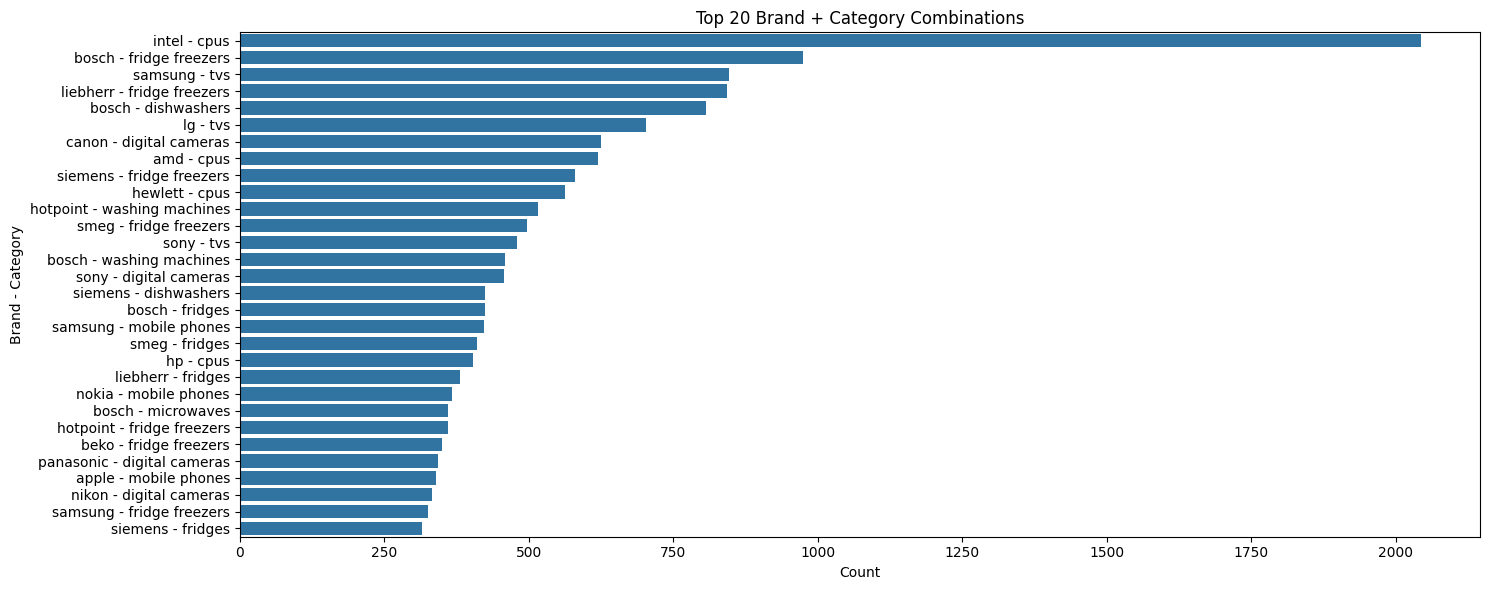

In [ ]:
df['brand_category'] = df['brand'] + " - " + df['Category_Label']

plt.figure(figsize=(15,6))
sns.countplot(data=df, y='brand_category', order=df['brand_category'].value_counts().index[:30])
plt.title("Top 20 Brand + Category Combinations")
plt.xlabel("Count")
plt.ylabel("Brand - Category")
plt.tight_layout()
plt.show()


## Step 16: Model Training and Evaluation

In this step, we train multiple classification models on the dataset using key engineered features. The selected features are:

- Product_Title (text description of the product)

- brand (product brand)

- title_word_count (number of words in the title)

- digit_count (number of digits in the title)

The target variable is Category_Label.

Preprocessing includes TF-IDF for textual features, One-Hot Encoding for the brand, and MinMaxScaler for numeric features.

The models trained and evaluated are:

- Logistic Regression

- Decision Tree

- Random Forest

- Support Vector Machine

Evaluation is performed using the classification report (precision, recall, F1-score) for each category.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Features and label
X = df[[
    "Product_Title",
    "brand",
    "title_word_count",
    "digit_count"
]]
y = df["Category_Label"]

# Train - test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), "Product_Title"),
        ("brand", OneHotEncoder(handle_unknown="ignore"), ["brand"]),
        ("numeric", MinMaxScaler(), ["title_word_count", "digit_count"])
    ]
)

# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n {name}")

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(classification_report(y_test, y_pred))



 Logistic Regression
                  precision    recall  f1-score   support

            cpus       1.00      1.00      1.00       758
 digital cameras       1.00      0.99      1.00       532
     dishwashers       0.92      0.96      0.94       675
 fridge freezers       0.92      0.96      0.94      1521
         fridges       0.95      0.87      0.91       705
      microwaves       1.00      0.95      0.97       461
   mobile phones       0.98      1.00      0.99       805
             tvs       0.98      0.99      0.99       701
washing machines       0.97      0.93      0.95       794

        accuracy                           0.96      6952
       macro avg       0.97      0.96      0.97      6952
    weighted avg       0.96      0.96      0.96      6952


 Decision Tree
                  precision    recall  f1-score   support

            cpus       1.00      0.99      0.99       758
 digital cameras       0.99      0.95      0.97       532
     dishwashers       0.92   

## Current Findings

From the model evaluation performed so far, the Support Vector Machine (SVM) has shown the highest accuracy among the tested classifiers. Based on this, SVM will be used as the primary model in the upcoming steps and further analyses.

Other models provide useful benchmarks, but for subsequent feature testing and refinements, SVM will serve as the reference point.

## Final Conclusion

After loading, inspecting, and cleaning the dataset, the data is now fully prepared for modeling. Missing values were handled, column names standardized, inconsistencies removed, and additional text-based and numerical features engineered. The exploratory analysis of categories, brands, and outliers provided a clear understanding of the dataset’s structure and potential challenges.

Following the training of multiple models (Logistic Regression, Decision Tree, Random Forest, and SVM), Support Vector Machine (SVM) achieved the best overall performance. SVM will therefore be used as the primary model in the next steps for further optimization and feature refinement.